# Using mintalib indicators

In [75]:
import matplotlib as mpl
import matplotlib.pyplot as plt

from mintalib.samples import sample_prices
from mintalib.indicators import ROC, SMA, EMA, RSI, MACD, TRANGE, ATR, SLOPE, EVAL

mpl.rc("figure", figsize=(12, 9))

In [76]:
prices = sample_prices()
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11056 entries, 1980-12-12 to 2024-10-21
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    11056 non-null  float64
 1   high    11056 non-null  float64
 2   low     11056 non-null  float64
 3   close   11056 non-null  float64
 4   volume  11056 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 518.2 KB


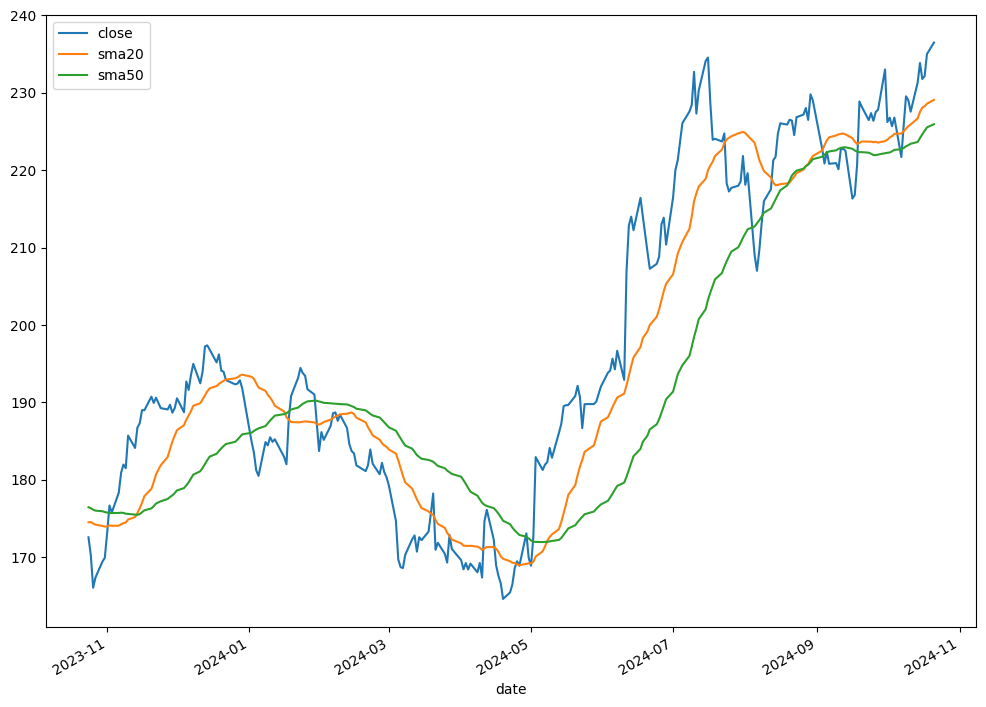

In [77]:
prices = prices.assign(
    sma20 = SMA(20),
    sma50 = SMA(50)
)

prices.tail(250).plot(
    y=["close", "sma20", "sma50"],
);

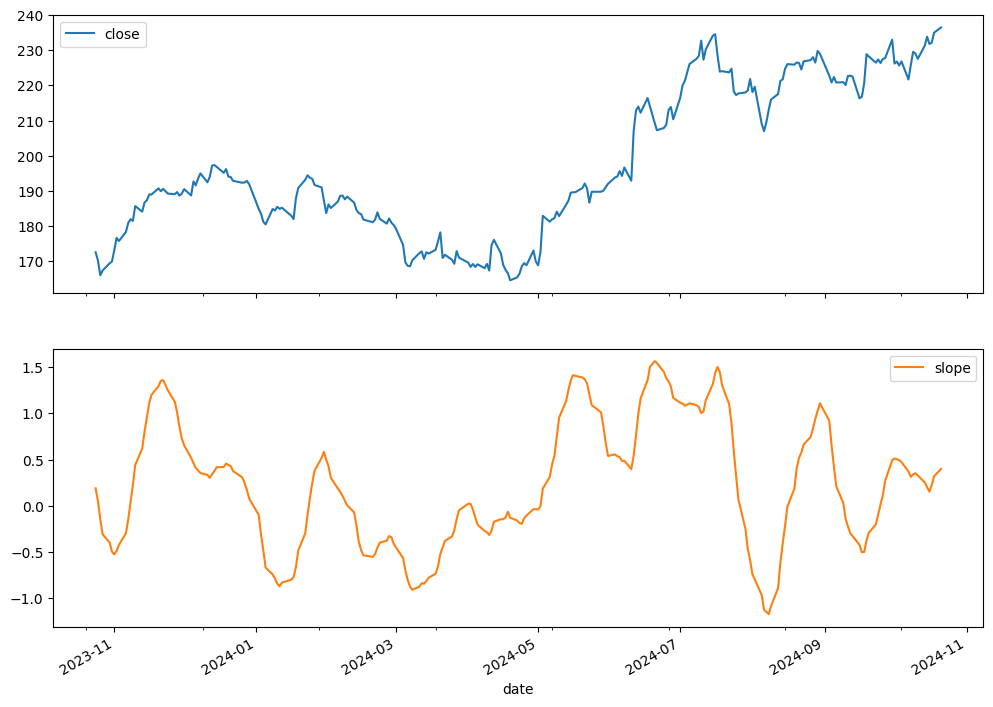

In [78]:
prices = prices.assign(
    slope = SLOPE(20),
)

prices.tail(250).plot(
    y=["close", "slope"],
    subplots=[['close']],
);


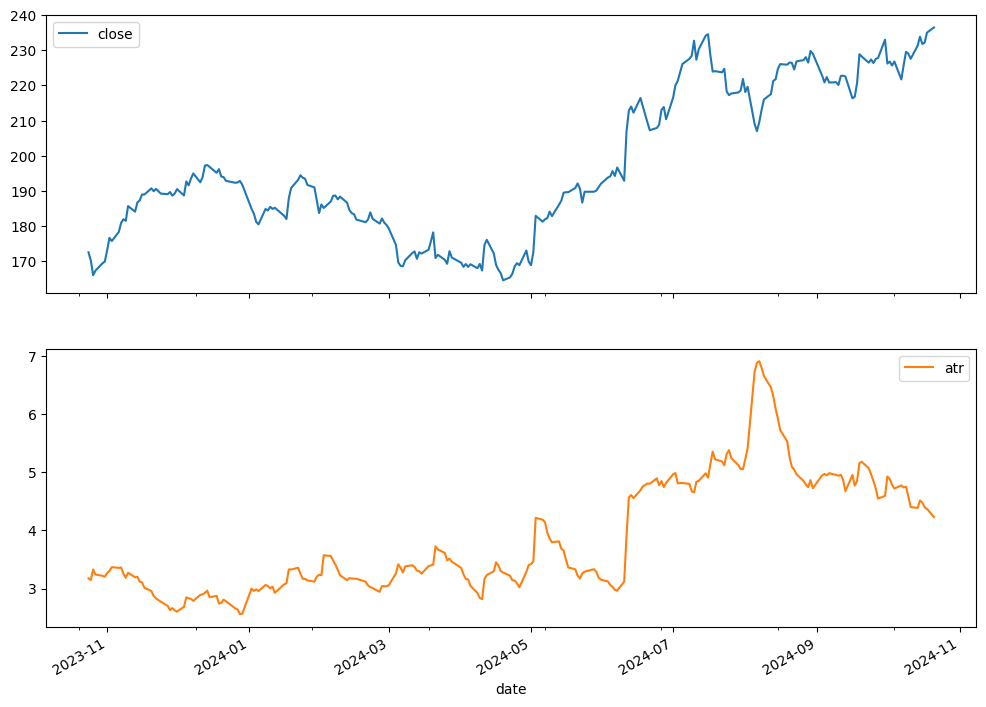

In [79]:
prices = prices.assign(
    atr = ATR()
)

prices.tail(250).plot(
    y=["close", "atr"],
    subplots=[['close']],
);

In [80]:
prices.assign(
    rsi=RSI(),
    sma20=SMA(20),
    sma50=SMA(50),
    sma200=SMA(200),
    slope20=SLOPE(20),
    pos=EVAL("sma50 > sma200 and slope20 > 0.0"),
).tail()

,open,high,low,close,volume,sma20,sma50,slope,atr,rsi,sma200,slope20,pos
date,,,,,,,,,,,,,
2024-10-15,233.610001,237.490005,232.369995,233.850006,64751400,227.524000,224.138625,0.200226,4.516121,61.199897,198.832826,0.200226,True
2024-10-16,231.600006,232.119995,229.839996,231.779999,34082200,228.078500,224.634417,0.153121,4.479971,57.519445,199.032715,0.153121,True
2024-10-17,233.429993,233.850006,230.520004,232.149994,32993800,228.242500,225.085868,0.223782,4.397830,58.005573,199.268774,0.223782,True
2024-10-18,236.179993,236.179993,234.009995,235.000000,46431500,228.582500,225.524600,0.319647,4.371556,61.646411,199.526006,0.319647,True
2024-10-21,234.449997,236.850006,234.449997,236.479996,36220800,229.082999,225.934400,0.399113,4.230731,63.419998,199.802295,0.399113,True


In [81]:
macd = MACD() @ prices
macd


,macd,macdsignal,macdhist
date,,,
1980-12-12,NaN,NaN,NaN
1980-12-15,NaN,NaN,NaN
1980-12-16,NaN,NaN,NaN
1980-12-17,NaN,NaN,NaN
1980-12-18,NaN,NaN,NaN
...,...,...,...
2024-10-15,1.815958,1.313965,0.501993
2024-10-16,1.941114,1.439395,0.501719
2024-10-17,2.046565,1.560829,0.485736


<Axes: xlabel='date'>

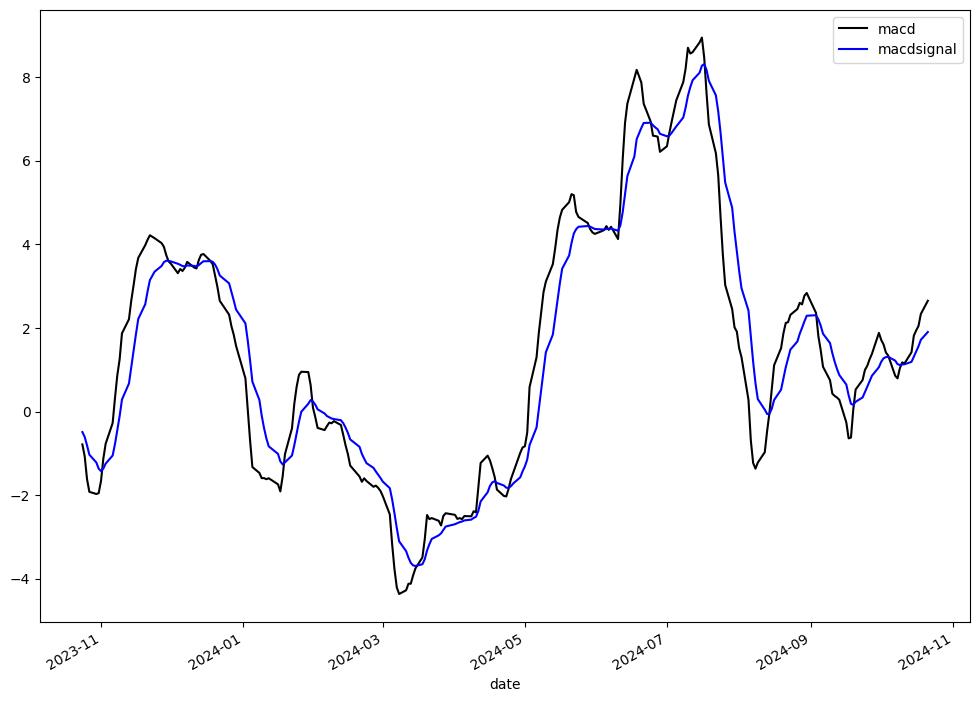

In [83]:
fig, ax = plt.subplots()

# macd.tail(250).plot(y = "macdhist", style="b", kind="bar", xticks=[], ax=ax)
macd.tail(250).plot(y = ["macd", "macdsignal"], style=["k", "b"], kind="line", ax=ax)

